Input File:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import afm_functions as afm
import os
import pandas as pd
import plotly.express as px
from PIL import Image, ImageDraw, ImageFont
import io

image_file = r"C:\Users\poeda\OneDrive\Documents\Luo Group\AFM Images\TRT PtTe\PtTe1.017 real image.png"
image_3d_file = r"C:\Users\poeda\OneDrive\Documents\Luo Group\AFM Images\TRT PtTe\PtTe1.017 3d.png"
optical_image_file = r"C:\Users\poeda\OneDrive\Documents\Luo Group\AFM Images\TRT PtTe\sample 116_07_2025__10x.png"
hieghts_csv = r"C:\Users\poeda\OneDrive\Documents\Luo Group\AFM Images\TRT PtTe\PtTe1.017 height.csv"

images = [optical_image_file, image_3d_file, image_file]
name = os.path.splitext(os.path.basename(image_file))[0]
data = afm.import_data(hieghts_csv)

Height Graph

In [2]:
fig, df = afm.plotly_graph(data)
fig.update_layout(title=name+" Profile Heights")
fig.show()


Average Data

In [9]:
averaged_data = afm.threshold_averaging(data, 0.25e-8)
av_fig, av_df = afm.plotly_graph(averaged_data)
av_fig.update_layout(title=name+" Averaged Profile Heights")
av_fig.show()


Determine Heights

In [11]:
#temp_data = data.copy()
temp_data = averaged_data.copy()

profile = [1,2,3]
result_dict = {}
for i in profile:
    x_data, y_data = afm.scatter_data(temp_data, i)
    afm.select_nearest_points_with_sliders(x_data, y_data, result_dict, i, name)
    

Output()

Button(button_style='success', description='Confirm Selection', style=ButtonStyle())

Output()

Output()

Button(button_style='success', description='Confirm Selection', style=ButtonStyle())

Output()

Output()

Button(button_style='success', description='Confirm Selection', style=ButtonStyle())

Output()

Create Final Poster

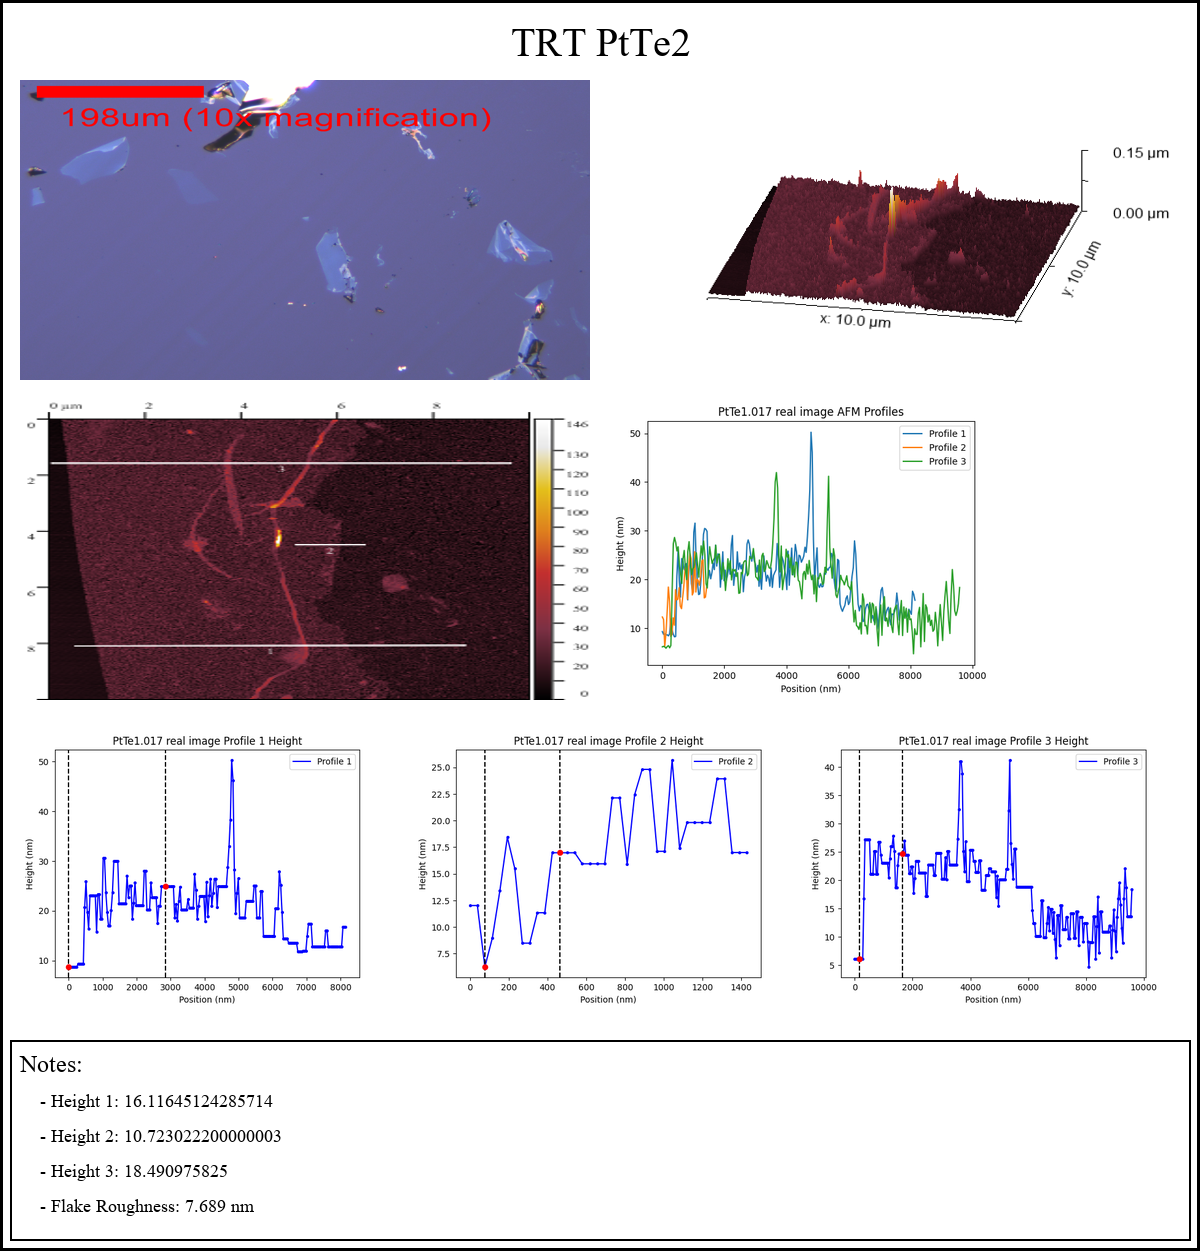

In [13]:
plt.ioff()

extra_notes = ["Flake Roughness: 7.689 nm"]

height_figs = [inner_dict['fig'] for inner_dict in result_dict.values()]
height_values = [(f"Height {outer_key}: {str(inner['height'])}") for outer_key, inner in result_dict.items()]
all_notes = height_values + extra_notes

afm.create_report(
    title= "TRT PtTe2",
    image_paths=images,
    main_fig=afm.graph(data, name),
    small_figs=height_figs,
    notes=all_notes
)